In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from IPython.display import display as dsp
%matplotlib inline

# Initialize KNN, add Data

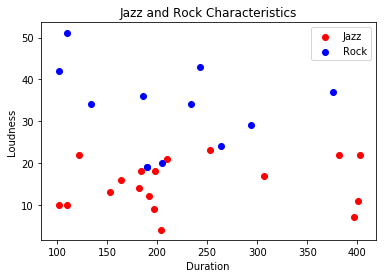

In [3]:
#Create Data
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [4]:
#Initialize and Train Classifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [5]:

neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


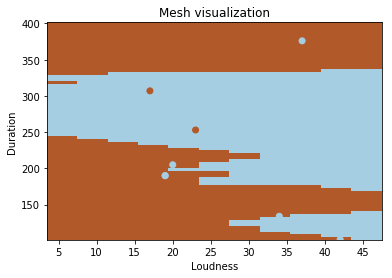

In [6]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Change Mesh Size

# KNN Implementation

In [8]:
dsp(music.head())

def distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 +(y2 - y1)**2 )

#def findNearestNeighbors(x, y, music, n):
#    for point in music:
#        xm = music.loc['distance']

def knn_jazz(music, mesh, neighbors = 1):
    dMin = min(music['duration'])
    dMax = max(music['duration'])
    lMin = min(music['loudness'])
    lMax = max(music['loudness'])
    
    dIndex = np.arange(dMin, dMax, (dMax - dMin) / mesh)
    lIndex = np.arange(lMin, lMax, (lMax - lMin) / mesh)
    
    #w = len(dIndex)
    #h = len(lIndex)
    
    results = pd.DataFrame()
    results['d'] = dIndex
       
    for l in range(len(lIndex)):
        lRes = []
            
        for d in range(len(dIndex)):
            lRes.append(np.nan)
                
            nearestD = music.loc[0, 'duration']
            nearestL = music.loc[0, 'loudness']
                
            nearest_distance = distance(d, l, nearestD, nearestL)
            
            for i in range(len(music['duration'])):
                di = music.loc[i, 'duration']
                    
                li = music.loc[i, 'loudness']
                
                if distance(di, li, d, l) < nearest_distance:
                    lRes[l] = music[(music.index == i)]['jazz']
                    
            results[str(l * (dMax - dMin) / mesh)] = lRes #Why not?
                
                

            
    
knn_jazz(music, 4)
    

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


ValueError: Length of values does not match length of index